In [12]:
import numpy as np
import matplotlib.pyplot as plt
import codecs
import os
import tensorflow as tf
from tqdm import tqdm
from jamo import h2j, j2hcj

from hyperparams import Hyperparams as hp
from datafeeder import DataFeeder
from utils import load_vocab

plt.rcParams['figure.figsize'] = [10, 5]

In [13]:
trascript = hp.transcript_pos
lines = codecs.open(trascript, 'r', 'utf-8').readlines()

if not (os.path.isdir(hp.mels_dir)):
    os.mkdir(hp.mels_dir)
    print('{%s} does not exist, created {%s}'.format(hp.mels_dir, hp.mels_dir))
    
if not (os.path.isdir(hp.mags_dir)):
    os.mkdir(hp.mags_dir)
    print('{%s} does not exist, created {%s}'.format(hp.mags_dir, hp.mags_dir))

In [14]:
fnames, texts, secs, text_lengths = [], [], [], []
char2idx, idx2char = load_vocab();

for line in tqdm(lines):
    line = j2hcj(line)
    fname, _, text, sec = line.strip().split('|')
    encodedText = [char2idx[char] for char in text]
    encodedText = np.array(encodedText, np.int32)#.tostring()
    
    fnames.append(fname)
    texts.append(encodedText)
    secs.append(float(sec))
    text_lengths.append(len(encodedText))
    
fnames = np.asarray(fnames)
texts = np.asarray(texts)
secs = np.asarray(secs)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12853/12853 [00:01<00:00, 10384.66it/s]


In [15]:
metadata = list(zip(fnames, texts))

In [16]:
coordinator = tf.train.Coordinator()

In [17]:
import sys
del sys.modules['datafeeder']
from datafeeder import DataFeeder


feeder = DataFeeder(metadata, coordinator)

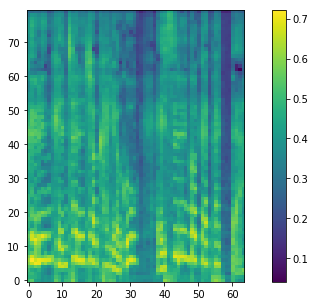

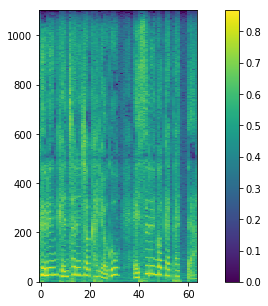

In [18]:
text, mel, spec, l = feeder._load_next()
plt.imshow(mel, origin='lower')
plt.colorbar()
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.imshow(spec, origin='lower')
plt.colorbar()
ax.set_aspect(0.1)


In [19]:
with tf.Session() as sess:
    feeder.start_thread(sess)